In [1]:
import pandas as pd
import numpy as np
import obspy

from obspy.clients.fdsn import Client
from pnwstore.mseed import WaveformClient
from datetime import datetime
from matplotlib import pyplot as plt
from obspy import UTCDateTime


from tqdm import tqdm
from obspy.geodetics import locations2degrees, degrees2kilometers
from plot_utils import *

### Load the event data

In [2]:
import pandas as pd

# Load all the pick assignments 
mycatalog_picks = pd.read_csv('../../data/datasets_OR_005/all_pick_assignments_OR.csv')

# Drop duplicates and create a copy to avoid SettingWithCopyWarning
mycatalog = mycatalog_picks.drop_duplicates(subset=['idx']).copy()

# Convert the time series in all_pick_assignments to datetime
mycatalog['datetime'] = pd.to_datetime(mycatalog['time'], utc=True)

# Print mycatalog
mycatalog

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
0,0,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,10,-0.685211,BABR,P,1.465001e+09,2016-06-04 00:35:30.430365+00:00


In [3]:
mycatalog_picks

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick
0,0,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,10,-0.685211,BABR,P,1.465001e+09
1,1,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,24,-0.839957,BABR,S,1.465001e+09
2,2,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,21,0.746129,DBO,S,1.465001e+09
3,3,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,4,-0.944046,FISH,P,1.465001e+09
4,4,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,18,-0.463162,FISH,S,1.465001e+09
5,5,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,1,0.922904,HYS14,P,1.465001e+09
6,6,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,3,0.654513,HYSB1,P,1.465001e+09
7,7,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,8,-0.366367,JEDS,P,1.465001e+09
8,8,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,22,0.080618,JEDS,S,1.465001e+09
9,9,0,2016-06-04 00:35:30.430365+00:00,-49.492017,-52.653525,45.703125,12,44.024477,-126.117313,45.703125,0,5,-0.095213,RADR,P,1.465001e+09


### Use the plot_waveforms function to plot the waveforms

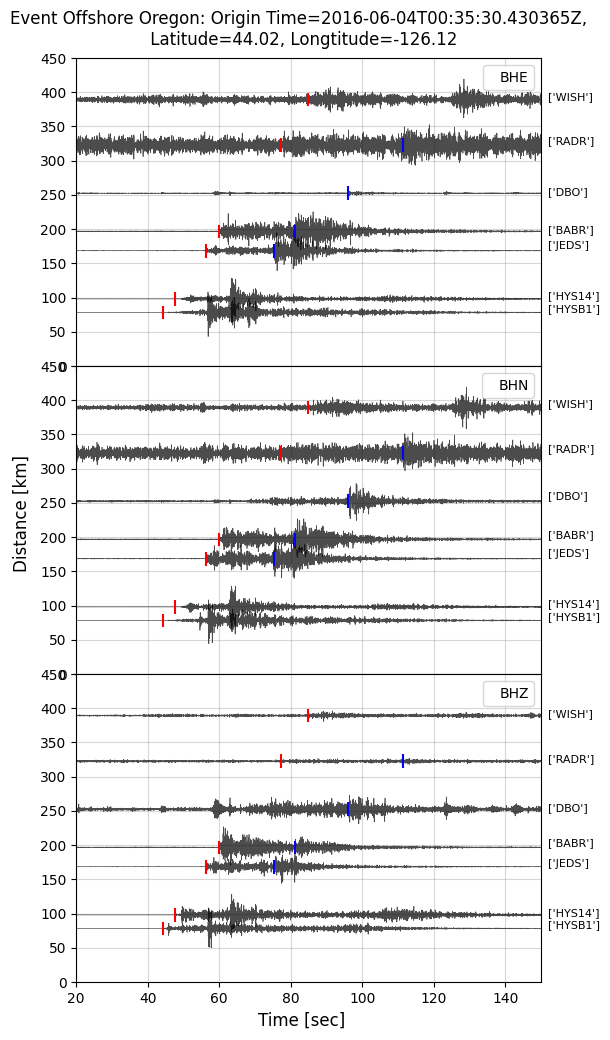

In [4]:
# parameters
idx= 0
mycatalog= mycatalog
mycatalog_picks=mycatalog_picks
network= "NV,OO,UW,UO"
channel= "BH?"
idx_sta= 11
title= "Event Offshore Oregon"
fig_title= "event_offshore_OR.png"
ylim= [0,450]
xlim= [20,150]

subplots_waveforms(idx,mycatalog,mycatalog_picks,network,channel,idx_sta,title,fig_title,ylim,xlim)

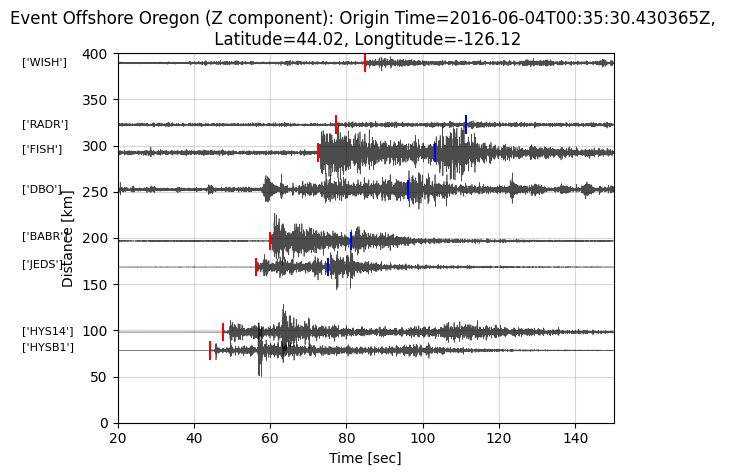

In [5]:
# parameters
idx= 0
mycatalog= mycatalog
mycatalog_picks=mycatalog_picks
network= "NV,OO,UW,UO"
channel= "?HZ"
idx_sta= 11
title= "Event Offshore Oregon (Z component)"
fig_title= "event_offshore_OR_Z.png"
ylim= (0,400)
xlim= (20,150)

plot_waveforms(idx,mycatalog,mycatalog_picks,network,channel,idx_sta,title,fig_title,ylim,xlim)

[ 0  6 12 18 24 30 36 42]


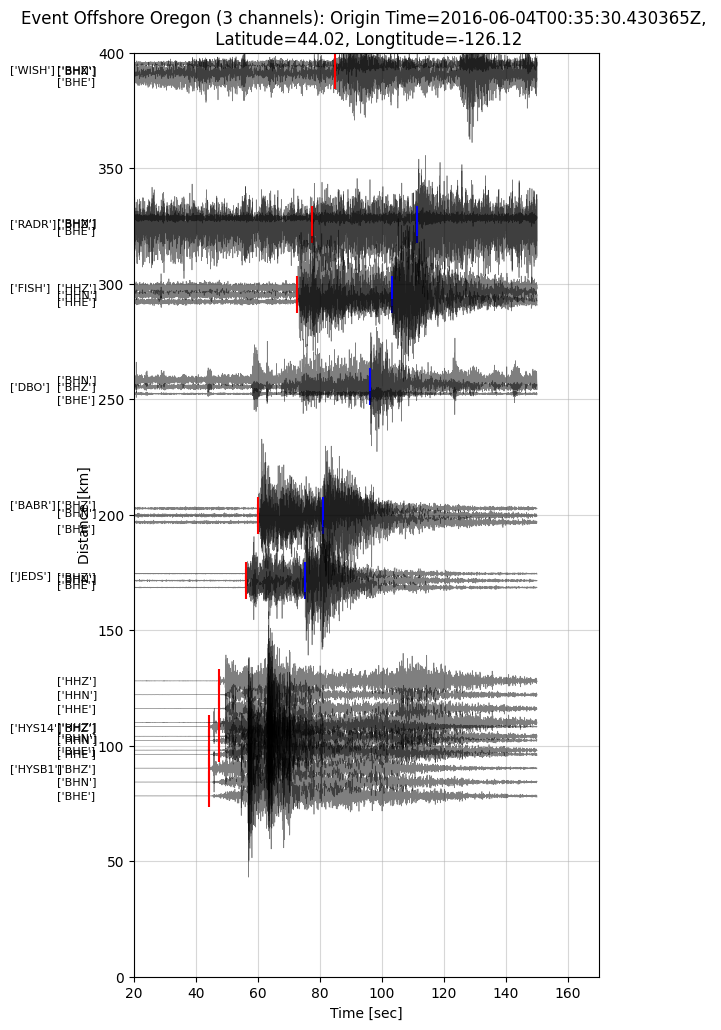

In [6]:
# parameters
idx= 0
mycatalog= mycatalog
mycatalog_picks=mycatalog_picks
network= "NV,OO,UW,UO"
channel= "?H?"
idx_sta= 11
title= "Event Offshore Oregon (3 channels)"
fig_title= "event_offshore_OR_3_channels.png"
ylim= (0,400)
xlim= (20,170)

plot_waveforms_3_channels(idx,mycatalog,mycatalog_picks,network,channel,idx_sta,title,fig_title,ylim,xlim)